In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

In [3]:
gen_dirs = glob.glob('../runs/*/predict/longterm/*')
print('found {} dirs'.format(len(gen_dirs)))

for i, gen_dir in enumerate(gen_dirs):
    print(i, gen_dir, '\n')

found 2 dirs
0 ../runs/gan_20190418_1255_gpu=2_bs=4_enc=[16_32_32_32]_dec=[32_32_32_32_16_8]_cbn=16_lr=0.0001_b1=0.0_b2=0.9_ep=0.1_pl=25.0_vr=1.0_ti=True_is=5_cs=5_rf=10_rs=25_glw=[100.0_10.0_5000.0_1.0]_clw=[1_1_10]_tag=brains_reg_gen_high_prec/predict/longterm/gen_280 

1 ../runs/gan_20190418_1124_gpu=4_bs=4_enc=[16_32_64_128]_dec=[128_64_32_32_16_8]_cbn=16_lr=0.0001_b1=0.0_b2=0.9_ep=0.1_pl=25.0_vr=1.0_ti=True_is=5_cs=5_rf=10_rs=25_glw=[100.0_10.0_5000.0_1.0]_clw=[1_1_10]_tag=brains_deep_high_prec_loss/predict/longterm/gen_400 



In [4]:
gen_dir = gen_dirs[1]

img_dirs = glob.glob(os.path.join(glob.escape(gen_dir), '*'))
print('found {} img_dirs'.format(len(img_dirs)), '\n')

for i, img_dir in enumerate(img_dirs):
    print(i, os.path.basename(img_dir))

found 5 img_dirs 

0 ADNI_245499
1 ADNI_32831
2 ADNI_85261
3 ADNI_299194
4 ADNI_283095


In [5]:
img_dir = img_dirs[1]

imgs = glob.glob(os.path.join(glob.escape(img_dir), '*yf*.nii.gz'))
print('found {} images'.format(len(imgs)))

found 41 images


/local/home/martipa/miniconda3/envs/repro_martipa/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


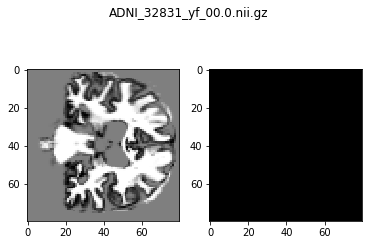

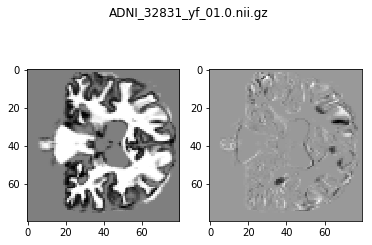

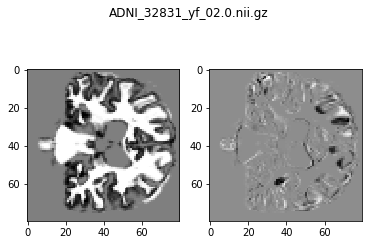

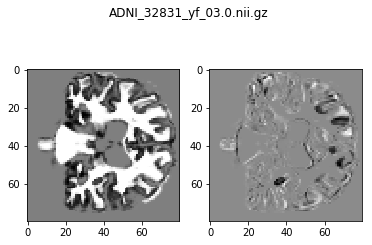

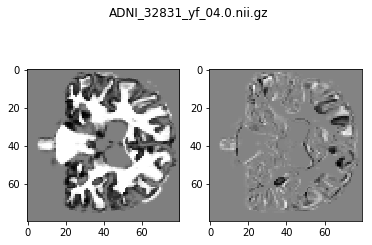

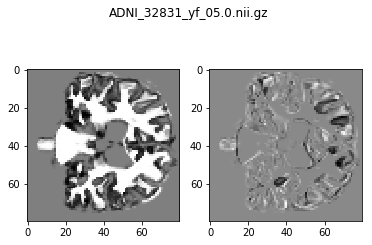

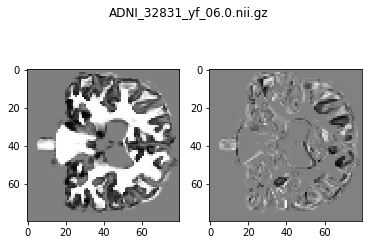

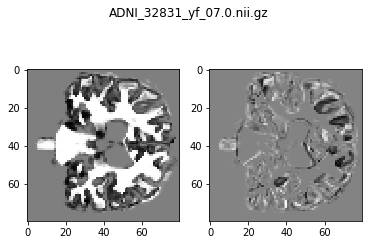

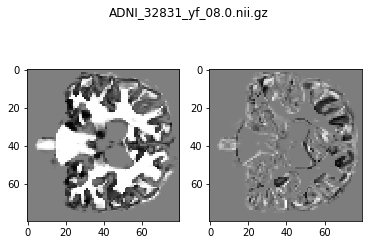

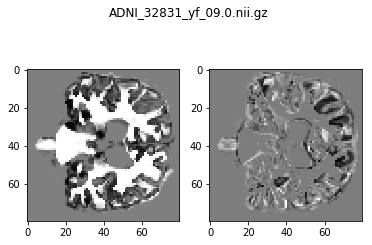

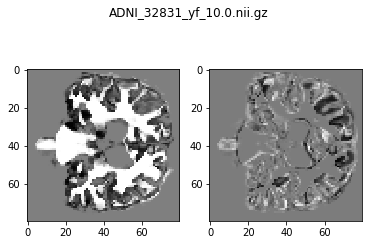

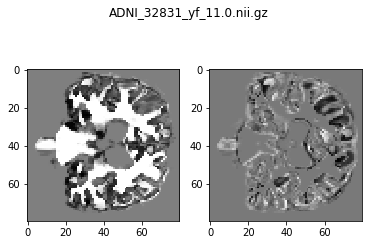

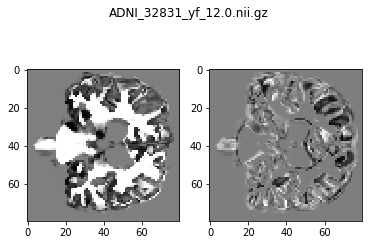

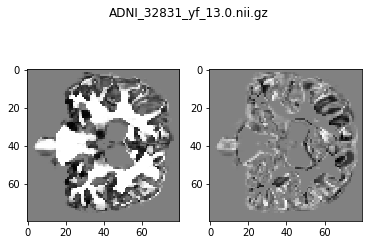

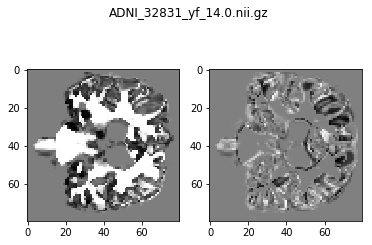

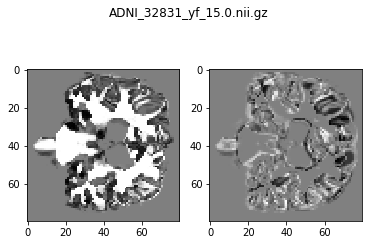

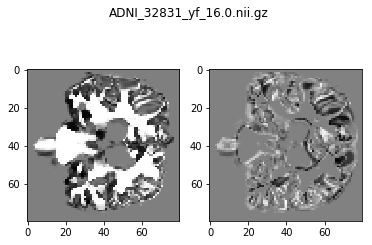

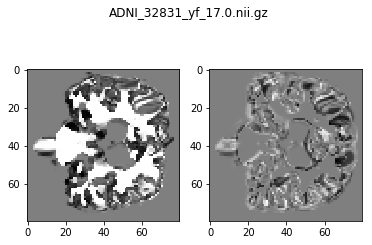

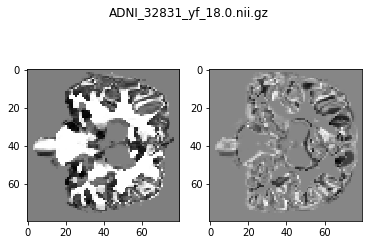

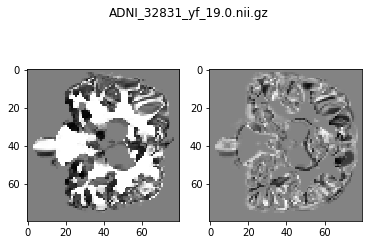

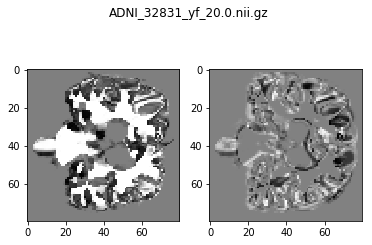

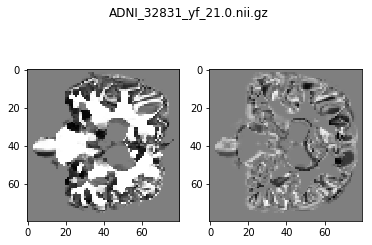

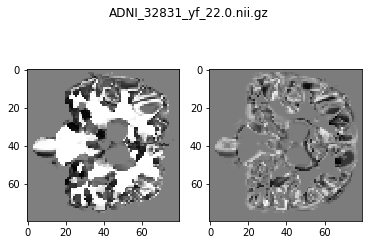

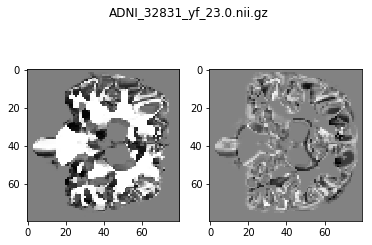

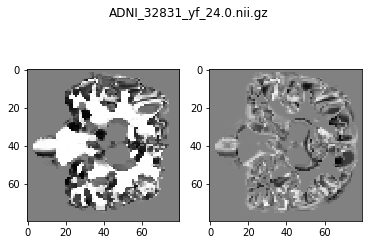

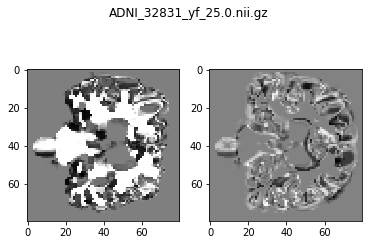

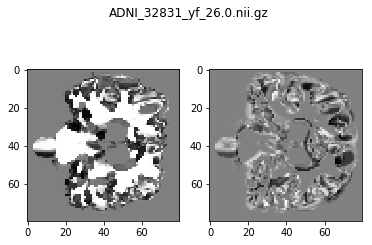

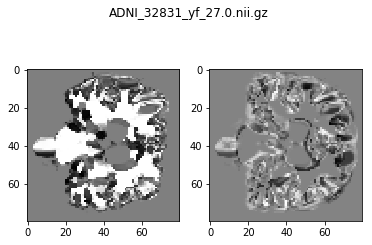

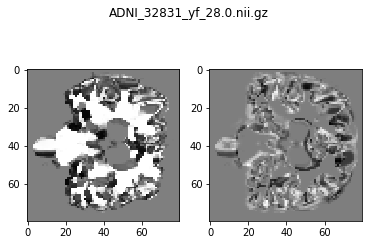

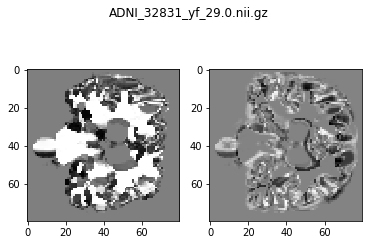

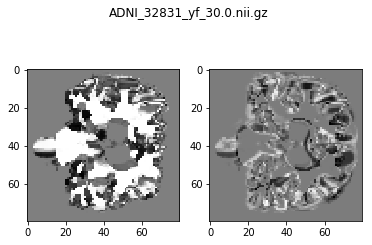

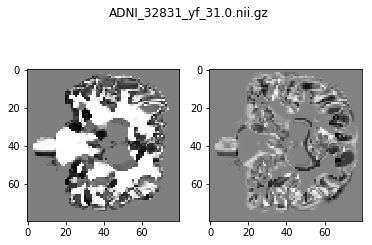

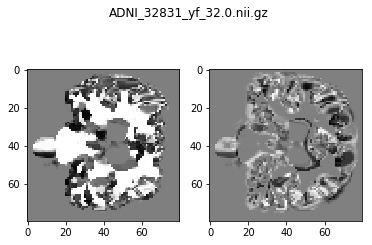

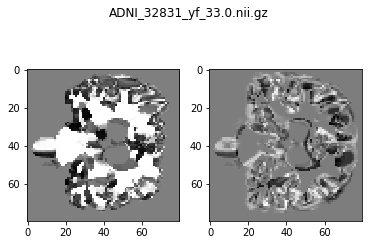

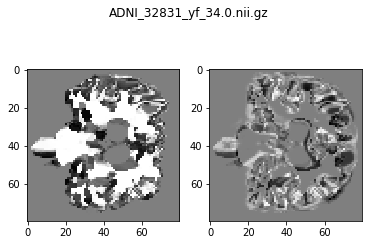

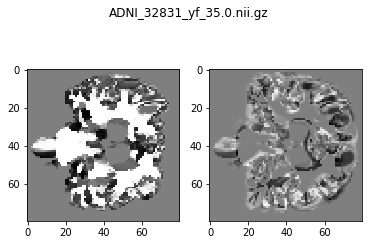

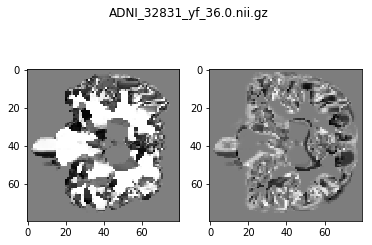

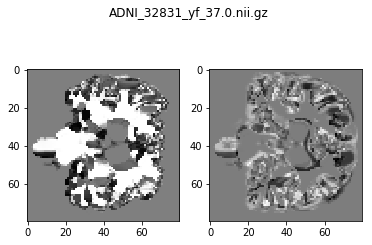

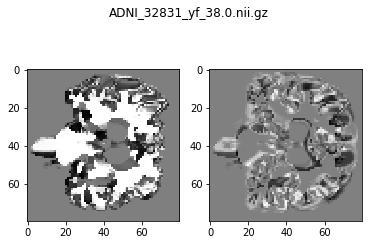

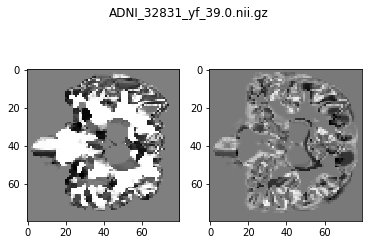

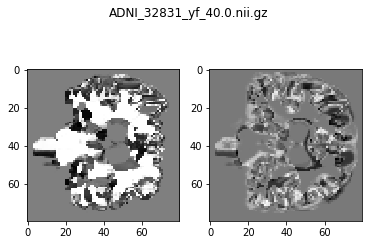

In [6]:
imgs = sorted(imgs)

vols = []

for img in imgs:
    nii = nib.load(img)
    vol = nii.get_data().astype(np.float32)
    vols.append(vol)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.suptitle(os.path.basename(img))
    plt.imshow(vol[:, 40, :, 0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow((vol - vols[0])[:, 40, :, 0], cmap='gray')